# Laboratorio 3 - Visión por Computadora

Autores:

- Nelson García
- Diego Linares
- Joaquín Puente

## Task 1 

Usted deberá demostrar comprensión teórica del criterio de Harris sin usar librerías. Para ello considere lo
siguiente.
Se te da la siguiente Matriz del Segundo Momento (Tensor de Estructura) M calculada en un píxel
específico (u,v) de una imagen:

   

$ M = \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} $

Y una segunda matriz M’ para otro píxel diferente:

$ M' = \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} $

  

Con esta información haga lo siguiente:

1. Calcule manualmente (muestra tu procedimiento) los Eigenvalores (λ1, λ2) para ambas matrices

Para hallar los eigenvalores hay que resolver la siguiente ecuación:

$ det(A - \lambda * I) = 0 $

En este caso para $ A = M $

$ det(M - \lambda * I) = 0 $

$ det( \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} - \begin{bmatrix} \lambda  \\ \lambda \end{bmatrix} * \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} \lambda - 120 & 5 \\ 5 & \lambda - 115 \end{bmatrix} ) = 0$

$ (\lambda - 120) (\lambda - 115) - 25 = 0 $

$ \lambda^2 - 120\lambda - 115\lambda + 13800 - 15 = \lambda^2 - 235\lambda + 13775 = 0 $

Se calculan las raíces con la fórmula cuadrática:

$ \lambda = \frac{235 \pm \sqrt{235^2 - 4(1)(13775)}}{2(1)} $

$ \lambda = \frac{235 \pm \sqrt{55225 - 55100}}{2} $

$ \lambda = \frac{235 \pm \sqrt{125}}{2} $

$ \lambda_1 = 123.09, \lambda_2 = 111.91 $ 

---

Para $ A = M' $

$ det(M' - \lambda * I) = 0 $

$ det( \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} - \begin{bmatrix} \lambda  \\ \lambda \end{bmatrix} * \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} \lambda - 200 & 10 \\ 10 & \lambda - 1 \end{bmatrix} ) = 0$

$ (\lambda - 200) (\lambda - 1) - 100 = 0 $

$ \lambda^2 - 200\lambda - 1\lambda + 200 - 100 = \lambda^2 - 201\lambda + 100 = 0 $

Se calculan las raíces con la fórmula cuadrática:

$ \lambda = \frac{201 \pm \sqrt{201^2 - 4(1)(100)}}{2(1)} $

$ \lambda = \frac{201 \pm \sqrt{40401 - 400}}{2} $

$ \lambda = \frac{201 \pm \sqrt{40001}}{2} $

$ \lambda_1 =200.05, \lambda_2 = 0.50 $ 

2. Calcule la Respuesta de Harris (R) para ambas matrices usando la fórmula vista en clase. Asuma k
= 0.04

$ R_{M} = det(M) - k(trace(M))^2 $

$ det(M) =  \lambda_1 * \lambda_2 , trace(M) = \lambda_1 + \lambda_2 $

$ R_{M} = \lambda_{1M} * \lambda_{2M} - k(\lambda_{1M} + \lambda_{2M})^2 $

$ R_{M} = 123.09 * 111.91 - 0.04 (123.09 + 111.91)^2 $

$ R_{M} = 13775.0019 - 0.04(235)^2 = 13775.0019 - 0.04(55225) = 13775.0019 - 2209 = 11566.0019 $

--- 

$ R_{M'} = det(M') - k(trace(M'))^2 $

$ R_{M'} = \lambda_{1M'} * \lambda_{2M'} - k(\lambda_{1M'} + \lambda_{2M'})^2 $

$ R_{M'} = 200.05 * 0.5 - 0.04 (200.05 + 0.5)^2 = 100.025 - 0.04(200.55)^2 $

$ R_{M'} = 100.025 - 0.04(40220.3025) = 100.025 - 1608.8121 = - 1508.7871 $


3. Basado en tus resultados numéricos, clasifica qué representa cada píxel geométricamente: ¿Es una
Esquina, un Borde o una Región Plana? Justifica tu respuesta usando las definiciones de
eigenvalores vistas en clase.

$ R_{M} = 11566.0019 $ Y $ \lambda_1 = 123.09, \lambda_2 = 111.91 $ 

Como $ \lambda_1 $ y $\lambda_2$ son grandes y $R_{M} > 0$, este punto es candidato a esquina.

$ R_{M'} = - 1508.7871 $ Y $ \lambda_1 =200.05, \lambda_2 = 0.50 $ 

Como $\lambda_1 >> \lambda_2$  y $R_{M} < 0$, este punto es candidato a un borde.


## Task 2

En Esta parte se busca que usted implemente un sistema de correspondencia completo. Para esto debe
escribir un script en Python usando OpenCV. No se provee código base, debe estructurarlo usted mismo


In [1]:
import cv2
import numpy as np
from typing import Tuple, List, Optional
from matplotlib import pyplot as plt


def load_images_gray(path1: str, path2: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    if img1 is None:
        raise FileNotFoundError(f"No se pudo cargar: {path1}")
    if img2 is None:
        raise FileNotFoundError(f"No se pudo cargar: {path2}")

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    return color1, gray1, color2, gray2


def detect_and_describe_sift(gray: np.ndarray):
    sift = cv2.SIFT_create()
    kp, desc = sift.detectAndCompute(gray, None)
    return kp, desc


def detect_and_describe_orb(gray: np.ndarray, nfeatures: int = 2000):
    orb = cv2.ORB_create(nfeatures=nfeatures)
    kp, desc = orb.detectAndCompute(gray, None)
    return kp, desc


def build_matcher(algo: str) -> cv2.BFMatcher:
    if algo.upper() == "SIFT":
        return cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    elif algo.upper() == "ORB":
        return cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    else:
        raise ValueError(f"Algoritmo no soportado: {algo}")


def knn_match(desc1: Optional[np.ndarray], desc2: Optional[np.ndarray], matcher: cv2.BFMatcher, k: int = 2):
    if desc1 is None or desc2 is None:
        return []
    return matcher.knnMatch(desc1, desc2, k=k)


def lowe_ratio_test(matches_knn, ratio: float = 0.75) -> List[cv2.DMatch]:
    good = []
    for match in matches_knn:
        if len(match) == 2:
            m, n = match
            if m.distance < ratio * n.distance:
                good.append(m)
    return good


def draw_good_matches(
    img1_color: np.ndarray,
    kp1,
    img2_color: np.ndarray,
    kp2,
    good_matches: List[cv2.DMatch],
    max_draw: int = 200
) -> np.ndarray:
    result = cv2.drawMatches(
        img1_color, kp1,
        img2_color, kp2,
        good_matches[:max_draw],
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    return result


def run_task2_pipeline(path_img1: str, path_img2: str, ratio: float = 0.75):
    color1, gray1, color2, gray2 = load_images_gray(path_img1, path_img2)

    kp1_sift, desc1_sift = detect_and_describe_sift(gray1)
    kp2_sift, desc2_sift = detect_and_describe_sift(gray2)
    matcher_sift = build_matcher("SIFT")
    matches_sift = knn_match(desc1_sift, desc2_sift, matcher_sift)
    good_sift = lowe_ratio_test(matches_sift, ratio)
    print(f"SIFT: {len(kp1_sift)} kp img1, {len(kp2_sift)} kp img2, "
          f"{len(matches_sift)} matches totales, {len(good_sift)} buenos matches")

    kp1_orb, desc1_orb = detect_and_describe_orb(gray1)
    kp2_orb, desc2_orb = detect_and_describe_orb(gray2)
    matcher_orb = build_matcher("ORB")
    matches_orb = knn_match(desc1_orb, desc2_orb, matcher_orb)
    good_orb = lowe_ratio_test(matches_orb, ratio)
    print(f"ORB:  {len(kp1_orb)} kp img1, {len(kp2_orb)} kp img2, "
          f"{len(matches_orb)} matches totales, {len(good_orb)} buenos matches")

    img_sift = draw_good_matches(color1, kp1_sift, color2, kp2_sift, good_sift)
    img_orb = draw_good_matches(color1, kp1_orb, color2, kp2_orb, good_orb)

    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    axes[0].imshow(img_sift)
    axes[0].set_title(f"SIFT — {len(good_sift)} buenos matches (ratio={ratio})")
    axes[0].axis("off")

    axes[1].imshow(img_orb)
    axes[1].set_title(f"ORB — {len(good_orb)} buenos matches (ratio={ratio})")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

SIFT: 6662 kp img1, 2045 kp img2, 6662 matches totales, 169 buenos matches
ORB:  2000 kp img1, 2000 kp img2, 2000 matches totales, 17 buenos matches


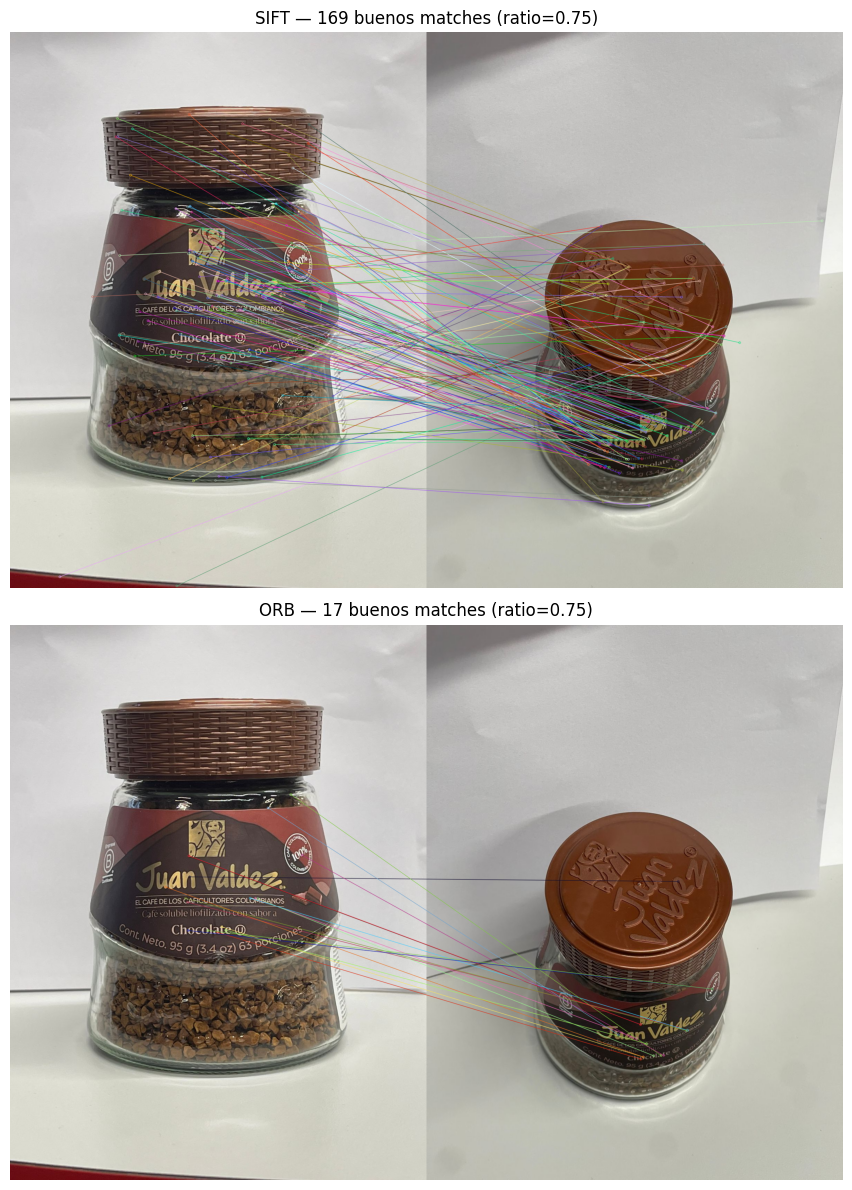

In [2]:
# Cambiar las rutas a tus imágenes (vista frontal y vista rotada/escalada)
run_task2_pipeline("img1.jpeg", "img2.jpeg")

In [3]:
import cv2
import numpy as np
import time
from dataclasses import dataclass
from typing import Optional, List, Tuple, Dict

# Para que se vea que estoy reutilizando las funciones del task2, las vuelvo a copiar aquí
# Los nombres de las funciones reutilizados son: 
# load_images_gray, detect_and_describe_sift, detect_and_describe_orb, build_matcher
# knn_match lowe_ratio_test

@dataclass
class TimingResult:
    algoritmo: str
    detdesc_ms: float
    match_ms: float
    total_ms: float
    kp_img1: int
    kp_img2: int
    good_matches: int

def _ms(t0: float, t1: float) -> float:
    return (t1 - t0) * 1000.0

def time_sift_once(gray1: np.ndarray, gray2: np.ndarray, ratio: float) -> TimingResult:
    # Detección + descripción (img1)
    t0 = time.perf_counter()
    kp1, desc1 = detect_and_describe_sift(gray1)
    t1 = time.perf_counter()

    # Detección + descripción (img2)
    t2 = time.perf_counter()
    kp2, desc2 = detect_and_describe_sift(gray2)
    t3 = time.perf_counter()

    detdesc_ms = _ms(t0, t1) + _ms(t2, t3)

    # Matching (knn + ratio)
    matcher = build_matcher("SIFT")
    t4 = time.perf_counter()
    matches_knn = knn_match(desc1, desc2, matcher, k=2)
    good = lowe_ratio_test(matches_knn, ratio=ratio)
    t5 = time.perf_counter()

    match_ms = _ms(t4, t5)
    total_ms = detdesc_ms + match_ms

    return TimingResult(
        algoritmo="SIFT",
        detdesc_ms=detdesc_ms,
        match_ms=match_ms,
        total_ms=total_ms,
        kp_img1=len(kp1),
        kp_img2=len(kp2),
        good_matches=len(good),
    )

def time_orb_once(gray1: np.ndarray, gray2: np.ndarray, ratio: float, nfeatures: int = 2000) -> TimingResult:
    # Detección + descripción (img1)
    t0 = time.perf_counter()
    kp1, desc1 = detect_and_describe_orb(gray1, nfeatures=nfeatures)
    t1 = time.perf_counter()

    # Detección + descripción (img2)
    t2 = time.perf_counter()
    kp2, desc2 = detect_and_describe_orb(gray2, nfeatures=nfeatures)
    t3 = time.perf_counter()

    detdesc_ms = _ms(t0, t1) + _ms(t2, t3)

    # Matching (knn + ratio)
    matcher = build_matcher("ORB")
    t4 = time.perf_counter()
    matches_knn = knn_match(desc1, desc2, matcher, k=2)
    good = lowe_ratio_test(matches_knn, ratio=ratio)
    t5 = time.perf_counter()

    match_ms = _ms(t4, t5)
    total_ms = detdesc_ms + match_ms

    return TimingResult(
        algoritmo="ORB",
        detdesc_ms=detdesc_ms,
        match_ms=match_ms,
        total_ms=total_ms,
        kp_img1=len(kp1),
        kp_img2=len(kp2),
        good_matches=len(good),
    )

def average_results(results: List[TimingResult]) -> TimingResult:
    # promedia tiempos; keypoints y matches los dejo como promedio también (ok para reporte)
    n = len(results)
    return TimingResult(
        algoritmo=results[0].algoritmo,
        detdesc_ms=sum(r.detdesc_ms for r in results) / n,
        match_ms=sum(r.match_ms for r in results) / n,
        total_ms=sum(r.total_ms for r in results) / n,
        kp_img1=int(round(sum(r.kp_img1 for r in results) / n)),
        kp_img2=int(round(sum(r.kp_img2 for r in results) / n)),
        good_matches=int(round(sum(r.good_matches for r in results) / n)),
    )

def run_task3_timing(path_img1: str, path_img2: str, ratio: float = 0.75, repeats: int = 20, warmup: int = 3):
    _, gray1, _, gray2 = load_images_gray(path_img1, path_img2)

    # Warmup (para que no te contamine el primer run por inicializaciones internas)
    for _ in range(warmup):
        _ = time_sift_once(gray1, gray2, ratio)
        _ = time_orb_once(gray1, gray2, ratio)

    sift_runs = [time_sift_once(gray1, gray2, ratio) for _ in range(repeats)]
    orb_runs  = [time_orb_once(gray1, gray2, ratio) for _ in range(repeats)]

    sift_avg = average_results(sift_runs)
    orb_avg  = average_results(orb_runs)

    # Tabla (markdown simple para pegar al reporte)
    print("\nTabla (promedios):")
    print("| Algoritmo | Det+Desc (ms) | Matching (ms) | Total (ms) | Keypoints (A/B) | Buenos matches |")
    print("|---|---:|---:|---:|---:|---:|")
    for r in [sift_avg, orb_avg]:
        print(f"| {r.algoritmo} | {r.detdesc_ms:.2f} | {r.match_ms:.2f} | {r.total_ms:.2f} | {r.kp_img1}/{r.kp_img2} | {r.good_matches} |")

    # Además, devuelve por si quieres graficar o guardar
    return sift_avg, orb_avg

In [5]:
sift_avg, orb_avg = run_task3_timing("img1.jpeg", "img2.jpeg", ratio=0.75, repeats=20)


Tabla (promedios):
| Algoritmo | Det+Desc (ms) | Matching (ms) | Total (ms) | Keypoints (A/B) | Buenos matches |
|---|---:|---:|---:|---:|---:|
| SIFT | 596.68 | 24.30 | 620.98 | 6662/2045 | 169 |
| ORB | 50.34 | 5.77 | 56.11 | 2000/2000 | 17 |


In [6]:
def print_pretty_table(results):
    print("\nResultados promedio:\n")
    header = f"{'Algoritmo':<10} | {'Det+Desc (ms)':>14} | {'Matching (ms)':>13} | {'Total (ms)':>10} | {'Keypoints (A/B)':>16} | {'Buenos matches':>14}"
    print(header)
    print("-" * len(header))

    for r in results:
        print(f"{r.algoritmo:<10} | "
              f"{r.detdesc_ms:>14.2f} | "
              f"{r.match_ms:>13.2f} | "
              f"{r.total_ms:>10.2f} | "
              f"{f'{r.kp_img1}/{r.kp_img2}':>16} | "
              f"{r.good_matches:>14}")

In [7]:
print_pretty_table([sift_avg, orb_avg])


Resultados promedio:

Algoritmo  |  Det+Desc (ms) | Matching (ms) | Total (ms) |  Keypoints (A/B) | Buenos matches
--------------------------------------------------------------------------------------------
SIFT       |         596.68 |         24.30 |     620.98 |        6662/2045 |            169
ORB        |          50.34 |          5.77 |      56.11 |        2000/2000 |             17


#### A)
¿Cuál algoritmo elegiría para el Producto A (Drone de Carreras) y por qué? Base su
respuesta en los milisegundos que mediste y la tasa de refresco requerida (60 FPS ≈ 16ms
de presupuesto total)

* Bueno con 60 FPS deberia de significar que todo el procesamiento debe estar debajo de 16 ms por frame, pero como ninguno actualmente cumplio eso, entonces eligiria el mas bajo que es el ORB con 56.11  es casi 11 veces mas rapido y esta disenado para tiempo real, aunque tenga menos matches es mucho mas viable optimizarlo como el bajar la resolucion, reducir features, usar GPU y otras cosas 

#### B)
¿Cuál algoritmo elegirías para el Producto B (Inspección) y por qué? Analice la calidad
visual de los matches en los cambios de escala y rotación que probaste. ¿Falló ORB en
algún caso donde SIFT tuvo éxito?

* El tiempo no es critico aca, lo importante es la precision, robustez, calidad de matches y como vemos el 169 a 17 es gran diferencia, entonces seleccionaria el SIFT, ya que proporciona mas correspondencias validas, aunque es mas lento el tiempo no es un factor critico en este escenario. 

#### C) 
¿Las conclusiones que estamos alcanzando son justas y generalizables? ¿Por qué? ¿Qué
deberíamos considerar en futuras iteraciones?

* No se pueden generalizar porque solo se probo un objeto con una iluminacion, con un solo tipo de rotacion, y asi, para generalizar se deberia de probar distintas texturas, variar la iluminacion, agregar blur y ruido, diferentes escalas y esas cosas. 

En conclusion, no existe mejor algoritmo, existe mejor algoritmo para el problema que se quiere resolver.